# *Сеть персептронов*

#### 1. Установка библиотек

In [146]:
!pip install numpy
!pip install matplotlib
!pip install prettytable

#### 2. Импорт библиотек

In [1]:
import numpy as np
import random
from prettytable import PrettyTable
from matplotlib import pyplot as plt

#### 3. Шаблон нейросети

In [144]:
class Perceptron:
    #---ИНИЦИАЛИЗАЦИЯ ДАННЫХ---#
    def __init__(self,input_data:np.array, output_data, learning_rate):
        self.__x_train = input_data
        self.__y_train = output_data
        self.__w = np.random.uniform(size=(1,input_data.shape[1]))
        self.__lr = learning_rate
        self.__index_list = list(range(input_data.shape[0]))
        
    #---МЕТОД ВЫВОДА ИНФОРМАЦИИ НА ЭКРАН---#
    def __show_info(self,x,y,p_out):
        outprint_W = ""
        for i in range(len(self.__w)):
            for j in range(len(self.__w[i])):
                outprint_W += (f"w{j} ={self.__w[i][j]:5.2f} ")
        print(f"""Weights: {outprint_W}
Input Data:  {list(map(int,x[1:]))}
Expected output {int(y)}  Predicated Output: {int(p_out)}""")
    
    # def get_param(self):
    #     return {
    #         'data':[
    #             self.__x_train,
    #             self.__y_train,
    #         ],
    #         'weights': self.__w,
    #         'learning_rate': self.__lr
    #     }
    
    #---РАЗЛИЧНЫЕ ФУНКЦИИ АКТИВАЦИИ---#
    def sigmoid(self, x:float): # Сигмоидная функция активации
        return 1/(1+np.exp(-x)) 
    
    def relu(self, x:float): # "Выпрямленные линейные единицы" (RELu) 
        return np.maximum(0, x)
    
    def step_function(self,x:float): # Пошаговая функция активации
        if x < 0: return -1
        else: return 1
    
    #---ОБУЧЕНИЕ ПЕРСЕПТРОНА---#
    def train(self): 
        all_correct = False
        while not all_correct:
            all_correct = True
            random.shuffle(self.__index_list)
            
            
            for i in self.__index_list:
                x = self.__x_train[i]
                y = self.__y_train[0][i]
                z = np.dot(self.__w, x) # Скалярное произведение входа и весов
                p_out = self.step_function(z) # Применение функции активации, в данном случае применяем пошаговую функцию активации
                if  y != p_out: # Обновить веса, когда неправильно
                    print("____________________________\n 🔁 Updating the weights 🔁")
                    for j in range(0, len(self.__w[0])):
                        self.__w[0][j] += (y * self.__lr * x[j]) # Процесс поправления весов (Процесс "обучения")
                    all_correct = False
                    self.__show_info(x,y,p_out) # Вывод информации (Во время обучения)
        
        print("____________________________\n ✅ Weights updated ✅")
        self.__show_info(x,y,p_out) # Вывод информации (Обученного персептрона)
    
    #---МЕТОД "ПРОГНОЗИРОВАНИЯ"---#        
    def predict(self, input_data:np.array):
        z = np.dot(self.__w, input_data[0])
        return self.step_function(z)
    
    #---МЕТОД ВЫВОДА ГРАФИКА ПОСЛЕ ОБУЧЕНИЯ---#
    def show_training(self, xlim:list[float,float] = [-1.1,1.1], ylim:list[float,float] = [-1.1,1.1]):
        x1 = [self.__x_train[0][1], self.__x_train[-1][1]] 
        x2 = [-(self.__w[0][1]/self.__w[0][2]) * x1[i] - (self.__w[0][0] / self.__w[0][2]) for i in range(len(x1))]
        for i in range(self.__x_train.shape[0]):
            if self.__y_train[0][i] == -1:
                plt.scatter(self.__x_train[i][1], self.__x_train[i][2], color='blue', marker='_')
            else:
                plt.scatter(self.__x_train[i][1], self.__x_train[i][2], color='red', marker='+')
        
        plt.xlim(xlim)
        plt.ylim(ylim)
        
        plt.axline(x1, x2, color='magenta')
        
        plt.show()
        
        

#### 4. Константы и тренировочные данные

In [145]:
LEARNING_RATE = 0.01
x_train = np.array([(1.0,-1.0,-1.0),
           (1.0,-1.0,1.0),
           (1.0,1.0,-1.0),
           (1.0,1.0,1.0)])

#### 5. Создаём экземпляры персептронов под каждую задачу

In [146]:
nand_perceptron = Perceptron(x_train, np.array([[1.0,1.0,1.0,-1.0]]), LEARNING_RATE)
or_perceptron = Perceptron(x_train, np.array([[-1.0,1.0,1.0,1.0]]), LEARNING_RATE)
and_perceptron = Perceptron(x_train, np.array([[-1.0,-1.0,-1.0,1.0]]), LEARNING_RATE)
not_perceptron = Perceptron(np.array([(1.0, -1.0),(1.0, 1.0)]), np.array([[1.0, -1.0]]), LEARNING_RATE)

#### 6. Обучаем персептроны

____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.35 w1 = 0.40 w2 = 0.15 
Input Data:  [1, 1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.36 w1 = 0.39 w2 = 0.14 
Input Data:  [-1, -1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.35 w1 = 0.38 w2 = 0.13 
Input Data:  [1, 1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.36 w1 = 0.37 w2 = 0.12 
Input Data:  [-1, -1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.37 w1 = 0.36 w2 = 0.11 
Input Data:  [-1, -1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.36 w1 = 0.35 w2 = 0.10 
Input Data:  [1, 1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Wei

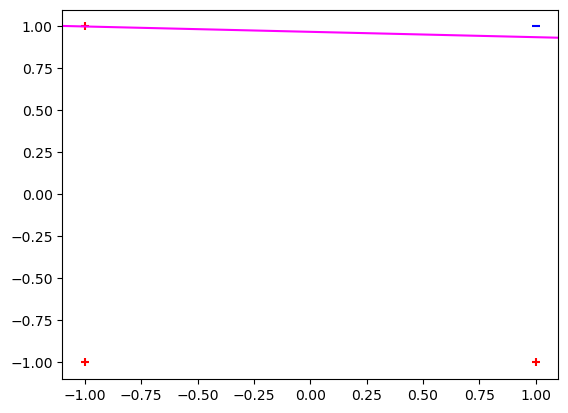

In [147]:
nand_perceptron.train()
nand_perceptron.show_training()

____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.94 w1 = 0.28 w2 = 0.60 
Input Data:  [-1, 1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.93 w1 = 0.27 w2 = 0.61 
Input Data:  [1, -1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.92 w1 = 0.28 w2 = 0.62 
Input Data:  [-1, -1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.91 w1 = 0.29 w2 = 0.61 
Input Data:  [-1, 1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.90 w1 = 0.28 w2 = 0.62 
Input Data:  [1, -1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.89 w1 = 0.29 w2 = 0.63 
Input Data:  [-1, -1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
W

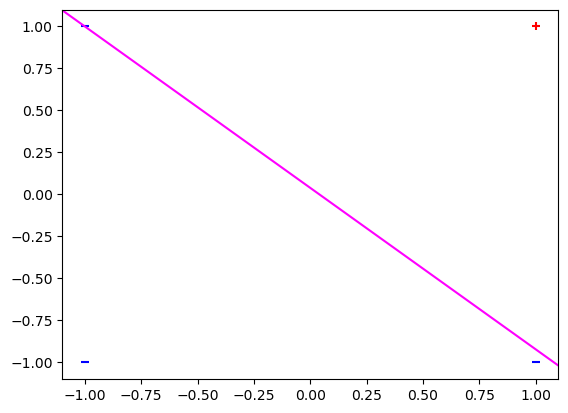

In [148]:
and_perceptron.train()
and_perceptron.show_training()

____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.54 w1 = 0.70 w2 = 0.05 
Input Data:  [-1, 1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.55 w1 = 0.69 w2 = 0.06 
Input Data:  [-1, 1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.56 w1 = 0.68 w2 = 0.07 
Input Data:  [-1, 1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.57 w1 = 0.67 w2 = 0.08 
Input Data:  [-1, 1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.58 w1 = 0.66 w2 = 0.09 
Input Data:  [-1, 1]
Expected output 1  Predicated Output: -1
____________________________
 ✅ Weights updated ✅
Weights: w0 = 0.58 w1 = 0.66 w2 = 0.09 
Input Data:  [-1, 1]
Expected output 1  Predicated Output: 1


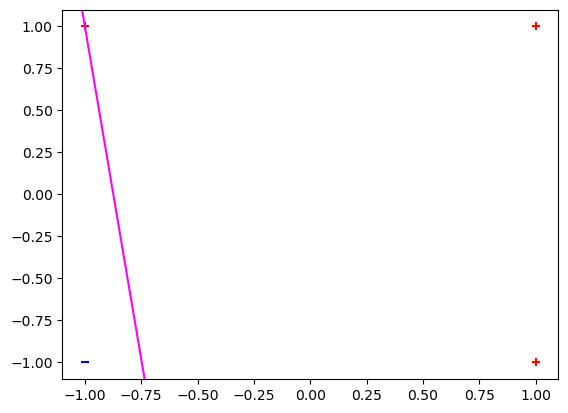

In [149]:
or_perceptron.train()
or_perceptron.show_training()

In [150]:
not_perceptron.train()


____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.53 w1 = 0.71 
Input Data:  [-1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.52 w1 = 0.70 
Input Data:  [1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.53 w1 = 0.69 
Input Data:  [-1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.52 w1 = 0.68 
Input Data:  [1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.51 w1 = 0.67 
Input Data:  [1]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.52 w1 = 0.66 
Input Data:  [-1]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.51 w1 = 0.65 
Input Data:  [1]
Expected output -1  Predicated Output

#### 7. Из обученных персептронов создаём логическую цепь

In [156]:
x_test = np.array([(1.0,-1.0,-1.0,-1.0),
                   (1.0,-1.0,-1.0,1.0),
                   (1.0, -1.0,1.0,-1.0),
                   (1.0, -1.0,1.0,1.0),
                   (1.0, 1.0,-1.0,-1.0),
                   (1.0, 1.0,-1.0,1.0),
                   (1.0, 1.0, 1.0, -1.0),
                   (1.0, 1.0, 1.0, 1.0)]) #(<bias>, <x1>, <x2>, <x3>)

pt = PrettyTable(["x1", "x2", "x3","x1 ∧ x2", "x1 ⊕ x3","F"])
output = []
for i in range(len(x_test)):
    up_block = not_perceptron.predict(np.array([(1.0, 
                                      nand_perceptron.predict(np.array([(x_test[i][0], x_test[i][1], x_test[i][2])])))
                                     ])
                           )
    down_block = and_perceptron.predict(np.array([(1.0, 
                                            nand_perceptron.predict(np.array([(x_test[i][0], x_test[i][1], x_test[i][3])])), 
                                            or_perceptron.predict(np.array([(x_test[i][0], x_test[i][1], x_test[i][3])])))
                                           ])
                                 )
    
    output.append(and_perceptron.predict(np.array([(1.0, up_block, down_block)])))
    pt.add_row([x_test[i][1], x_test[i][2],x_test[i][3], up_block, down_block, output[i]])
print(pt)

+------+------+------+---------+---------+----+
|  x1  |  x2  |  x3  | x1 ∧ x2 | x1 ⊕ x3 | F  |
+------+------+------+---------+---------+----+
| -1.0 | -1.0 | -1.0 |    -1   |    -1   | -1 |
| -1.0 | -1.0 | 1.0  |    -1   |    1    | -1 |
| -1.0 | 1.0  | -1.0 |    -1   |    -1   | -1 |
| -1.0 | 1.0  | 1.0  |    -1   |    1    | -1 |
| 1.0  | -1.0 | -1.0 |    -1   |    1    | -1 |
| 1.0  | -1.0 | 1.0  |    -1   |    -1   | -1 |
| 1.0  | 1.0  | -1.0 |    1    |    1    | 1  |
| 1.0  | 1.0  | 1.0  |    1    |    -1   | -1 |
+------+------+------+---------+---------+----+


In [155]:
p_out = [nand_perceptron.predict(np.array([x_train[i]])) for i in range(len(x_train))]
print(p_out)
nand_perceptron.show_output_graphic(x_train, p_out)


[1, 1, 1, -1]


AttributeError: 'Perceptron' object has no attribute 'show_output_graphic'

In [153]:
train_data = np.array([(1.0,1.9, -1.7),(1.0, 1.9, -0.8),(1.0, 1.9, 0.7),(1.0, 1.9, 0.8),(1.0, 1.9,1.2),(1.0, 1.9, 1.7),
                       (1.0,0.5, -1.7),(1.0, 0.5, -0.8),(1.0,0.5,0.7),(1.0,0.5,0.8),(1.0,0.5,1.2),(1.0,0.5,1.7),
                       (1.0,-0.6, -1.7),(1.0,-0.6,-0.8),(1.0,-0.6,0.7),(1.0,-0.6,0.8),(1.0,-0.6,1.2),(1.0,-0.6,1.7),
                       (1.0,-0.8,-1.7),(1.0,-0.8,-0.8),(1.0,-0.8,0.7),(1.0,-0.8,0.8),(1.0,-0.8,1.2),(1.0,-0.8, 1.7),
                       (1.0,-1.2,-1.7),(1.0,-1.2,-0.8),(1.0,-1.2,0.7),(1.0,-1.2,0.8),(1.0,-1.2,1.2),(1.0,-1.2, 1.7),
                       (1.0,-1.9,-1.7),(1.0,-1.9,-0.8),(1.0,-1.9,0.7),(1.0,-1.9,0.8),(1.0,-1.9,1.2),(1.0, -1.9, 1.7)])
train_output = np.array([[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0,
                         -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 
                         -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 
                         -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 
                         -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 
                         -1.0, -1.0, 1.0, 1.0, 1.0, 1.0,]])
nor_perceptron = Perceptron(train_data,train_output,0.1)

In [154]:
nor_perceptron.train()

____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.11 w1 = 0.37 w2 = 0.89 
Input Data:  [1, 0]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.01 w1 = 0.43 w2 = 0.82 
Input Data:  [0, 0]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.11 w1 = 0.24 w2 = 0.89 
Input Data:  [-1, 0]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.01 w1 = 0.36 w2 = 0.82 
Input Data:  [-1, 0]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 =-0.09 w1 = 0.44 w2 = 0.74 
Input Data:  [0, 0]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 =-0.19 w1 = 0.25 w2 = 0.82 
Input Data:  [1, 0]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights

In [47]:
print(nor_perceptron.predict(np.array([(1.0,-1.9,1.7)])))

1
